# TRABAJO PRÁCTICO INTEGRADOR N°1

## Sistema de Análisis de Documentos Digitalizados

---

**Información del Estudiante:**
- **Nombre y Apellido:** Alfredo Poblete
- **Fecha de Entrega:** 24 de Septiembre de 2025
- **Materia:** Procesamiento de Imágenes - IFTS24

---

### Objetivo

Desarrollar un sistema básico de análisis automático de documentos digitalizados que integre las técnicas de procesamiento de imágenes estudiadas en el curso.

### Estructura del Trabajo

| Parte | Descripción | Peso |
|-------|-------------|------|
| **1** | Fundamentos Teóricos | 20% |
| **2** | Setup del Entorno | 15% |
| **3** | Análisis de Imágenes | 35% |
| **4** | Preprocessing Básico | 30% |

**Dataset requerido:** 3 imágenes de documentos con diferentes características (buena calidad, rotada, con problemas de iluminación)

---

# PARTE 1: Fundamentos Teóricos

## ¿Por qué Cuadernos Interactivos para IA y Ciencias de Datos?

### Diferencias Metodológicas Fundamentales

El trabajo en inteligencia artificial y ciencias de datos requiere un enfoque metodológico diferente al desarrollo de software tradicional. Mientras que la programación tradicional sigue un flujo lineal y predecible, el trabajo con datos es inherentemente iterativo y exploratorio.

**Programación Tradicional:**
```
Requisitos → Diseño → Implementación → Testing → Producto
```

**Investigación en IA/Datos:**
```
Hipótesis ⟷ Experimento ⟷ Análisis ⟷ Refinamiento ⟷ Nueva Hipótesis
```

### Ventajas de los Cuadernos Interactivos

1. **Narrativa Científica:** Permiten documentar el proceso de pensamiento, no solo el resultado final
2. **Iteración Rápida:** Ejecutar y modificar secciones específicas sin reejecutar todo el programa
3. **Visualización Inmediata:** Ver resultados inmediatamente después de cada paso
4. **Comunicación Efectiva:** Stakeholders no técnicos pueden seguir el proceso y entender decisiones
5. **Reproducibilidad:** Otros investigadores pueden replicar exactamente los experimentos

### Casos de Uso en la Industria

- **Google Research:** Publica papers con cuadernos que permiten reproducir experimentos
- **Netflix:** Usa cuadernos para análisis de datos de usuarios y recomendaciones
- **Uber:** Análisis de patrones de viajes y optimización de rutas
- **Kaggle:** Plataforma completa basada en cuadernos para competencias de machine learning

### Cuándo Usar Cada Herramienta

**Usar Cuadernos para:**
- Análisis exploratorio de datos
- Experimentación y prototipado
- Comunicación de resultados
- Educación y documentación

**Usar Scripts para:**
- Sistemas en producción
- Automatización de tareas repetitivas
- APIs y servicios web
- Pipelines de datos automatizados

En este trabajo práctico, usaremos cuadernos porque estamos en la fase de investigación y experimentación, donde necesitamos entender los datos, probar diferentes enfoques y documentar nuestros hallazgos.

---

# PARTE 2: Setup del Entorno

En esta sección vas a configurar tu entorno de trabajo de manera profesional. Un setup bien hecho te ahorra tiempo y errores durante todo el proyecto.


## 2.1 Importaciones Básicas

Importá las librerías necesarias para procesamiento de imágenes y visualización:

In [6]:
# Importá aquí las librerías necesarias
# Necesitarás: numpy, matplotlib, opencv, y configuraciones básicas
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow


## 2.2 Funciones Utilitarias

Implementá una función básica para cargar y mostrar información de imágenes:

In [7]:
def cargar_imagen(ruta):
    imagen = cv2.imread(ruta)
    return imagen


def mostrar_info_imagen(imagen, titulo="Imagen"):
    print(f"Dimensiones de la imagen: {imagen.shape}")
    print(f"Tipo de datos de la imagen: {imagen.dtype}")
    print(f"Valor mínimo de la imagen: {np.min(imagen)}")
    print(f"Valor máximo de la imagen: {np.max(imagen)}")





## 2.3 Verificación del Setup

Probá que todo funciona creando una imagen sintética simple:

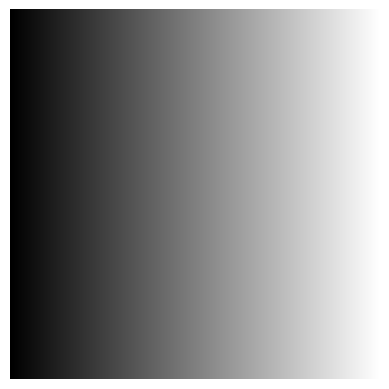

Dimensiones de la imagen: (256, 256, 3)
Tipo de datos de la imagen: uint8
Valor mínimo de la imagen: 0
Valor máximo de la imagen: 255


In [8]:
# Creá una imagen sintética simple (ej: gradiente o patrón)
imagen_simulacion = np.zeros((256, 256, 3), dtype=np.uint8)
imagen_simulacion[:, :, 0] = np.arange(256)
imagen_simulacion[:, :, 1] = np.arange(256)
imagen_simulacion[:, :, 2] = np.arange(256)

# Mostrá la imagen
plt.imshow(imagen_simulacion)
plt.axis('off')
plt.show()

# Probá tus funciones con esta imagen
mostrar_info_imagen(imagen_simulacion, "Imagen Simulada")

---

# PARTE 3: Análisis de Tu Dataset

Ahora vas a trabajar con tu dataset de 3 documentos. Esta parte es clave para entender qué problemas tenés que resolver.

**Preparación del Dataset:**
- Creá una carpeta llamada `dataset/` en la misma ubicación que este notebook
- Incluí exactamente 3 imágenes de documentos:
  1. Una de buena calidad (bien iluminada, recta)
  2. Una rotada o inclinada
  3. Una con problemas (oscura, borrosa, o con sombras)

## 3.1 Carga de las Imágenes

In [9]:
# Define las rutas a tus 3 imágenes
rutas_imagenes = [
    "/content/dataset/imagen1.jpg",  # Buena calidad
    "/content/dataset/imagen2.jpg",  # Rotada
    "/content/dataset/imagen3.jpg"   # Con problemas
]

# Carga las 3 imágenes usando tu función
imagenes = []
nombres = ["Buena Calidad", "Rotada", "Con Problemas"]

# Tu código aquí
def cargar_imagenes(rutas):
    imagenes = []
    for ruta in rutas:
        imagen = cargar_imagen(ruta)
        imagenes.append(imagen)
    return imagenes

imagenes = cargar_imagenes(rutas_imagenes)





## 3.2 Inspección Visual y Análisis


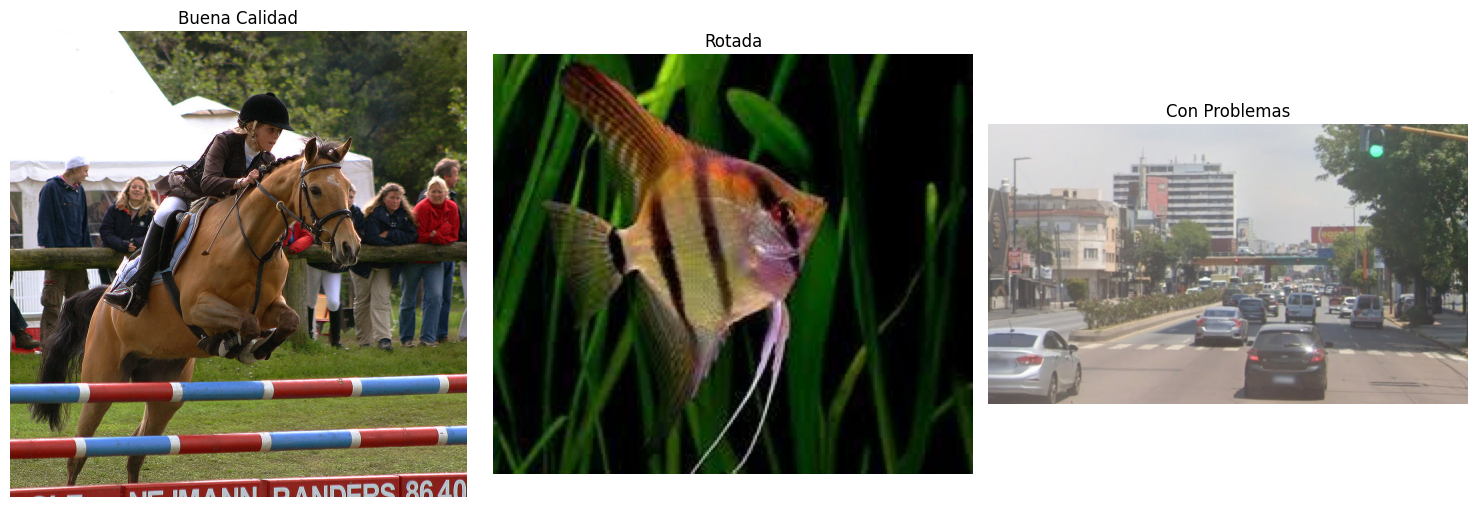

In [10]:
# Mostra las 3 imágenes lado a lado con sus nombres
# Usa subplots de matplotlib
# Tu código aquí

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagenes[0], cv2.COLOR_BGR2RGB))
plt.title(nombres[0])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(imagenes[1], cv2.COLOR_BGR2RGB))
plt.title(nombres[1])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(imagenes[2], cv2.COLOR_BGR2RGB))
plt.title(nombres[2])
plt.axis('off')

plt.tight_layout()




In [11]:
# Para cada imagen, mostrá información básica y un histograma
# Esto te ayuda a entender los problemas de cada una

# Tu código aquí

for i, imagen in enumerate(imagenes):
    print(f"\nInformación de la imagen {nombres[i]}:")
    mostrar_info_imagen(imagen)



Información de la imagen Buena Calidad:
Dimensiones de la imagen: (1021, 1000, 3)
Tipo de datos de la imagen: uint8
Valor mínimo de la imagen: 0
Valor máximo de la imagen: 255

Información de la imagen Rotada:
Dimensiones de la imagen: (210, 240, 3)
Tipo de datos de la imagen: uint8
Valor mínimo de la imagen: 0
Valor máximo de la imagen: 254

Información de la imagen Con Problemas:
Dimensiones de la imagen: (496, 851, 3)
Tipo de datos de la imagen: uint8
Valor mínimo de la imagen: 31
Valor máximo de la imagen: 255


## 3.3 Identificación de Problemas

Basándote en tu inspección visual, identificá los problemas principales de cada imagen:

**Imagen 1 (Buena Calidad):**
- Problemas identificados: Gran cantidad de elementos en la imagen
- Preprocessing necesario: Segmentacion Basica

**Imagen 2 (Rotada):**
- Problemas identificados: La imagen esta levemente rotada
- Preprocessing necesario: Correccion Basica

**Imagen 3 (Con Problemas):**
- Problemas identificados: Brillo y contraste desnivelados
- Preprocessing necesario: Ecualizacion

---

# PARTE 4: Preprocessing Básico

Ahora vas a aplicar técnicas de preprocessing para mejorar cada imagen. Trabajá con una imagen por vez.

## 4.1 Segmentación Básica

Separar el documento del fondo es el primer paso crítico.

**Material de consulta:** `Segmentacion.ipynb` (especialmente las funciones de umbralización)

In [12]:
# Elegí UNA de tus imágenes para trabajar primero
imagen_trabajo = imagenes[0][:, :, [2, 1, 0]]  # Cambiá el índice según necesites

# Convertí a escala de grises
imagen_grises = cv2.cvtColor(imagen_trabajo, cv2.COLOR_BGR2GRAY)

# Aplicá umbralización simple
# Definimos nuestros umbrales (límites) ajustados para el Caballo

canal_rojo = imagen_trabajo[:, :, 0]    # Canal 0 = Rojo
canal_verde = imagen_trabajo[:, :, 1]   # Canal 1 = Verde
canal_azul = imagen_trabajo[:, :, 2]    # Canal 2 = Azul

umbral_rojo_minimo = 90
umbral_verde_maximo = 80
umbral_azul_maximo = 40

condicion_rojo = canal_rojo >= umbral_rojo_minimo
condicion_verde = canal_verde <= umbral_verde_maximo
condicion_azul = canal_azul <= umbral_azul_maximo

mascara_caballo = condicion_rojo & condicion_verde & condicion_azul

print(f"\nAPLICANDO REGLAS:")
print(f"   Píxeles que cumplen condición ROJO: {condicion_rojo.sum():,}")
print(f"   Píxeles que cumplen condición VERDE: {condicion_verde.sum():,}")
print(f"   Píxeles que cumplen condición AZUL: {condicion_azul.sum():,}")



APLICANDO REGLAS:
   Píxeles que cumplen condición ROJO: 580,360
   Píxeles que cumplen condición VERDE: 481,018
   Píxeles que cumplen condición AZUL: 365,718


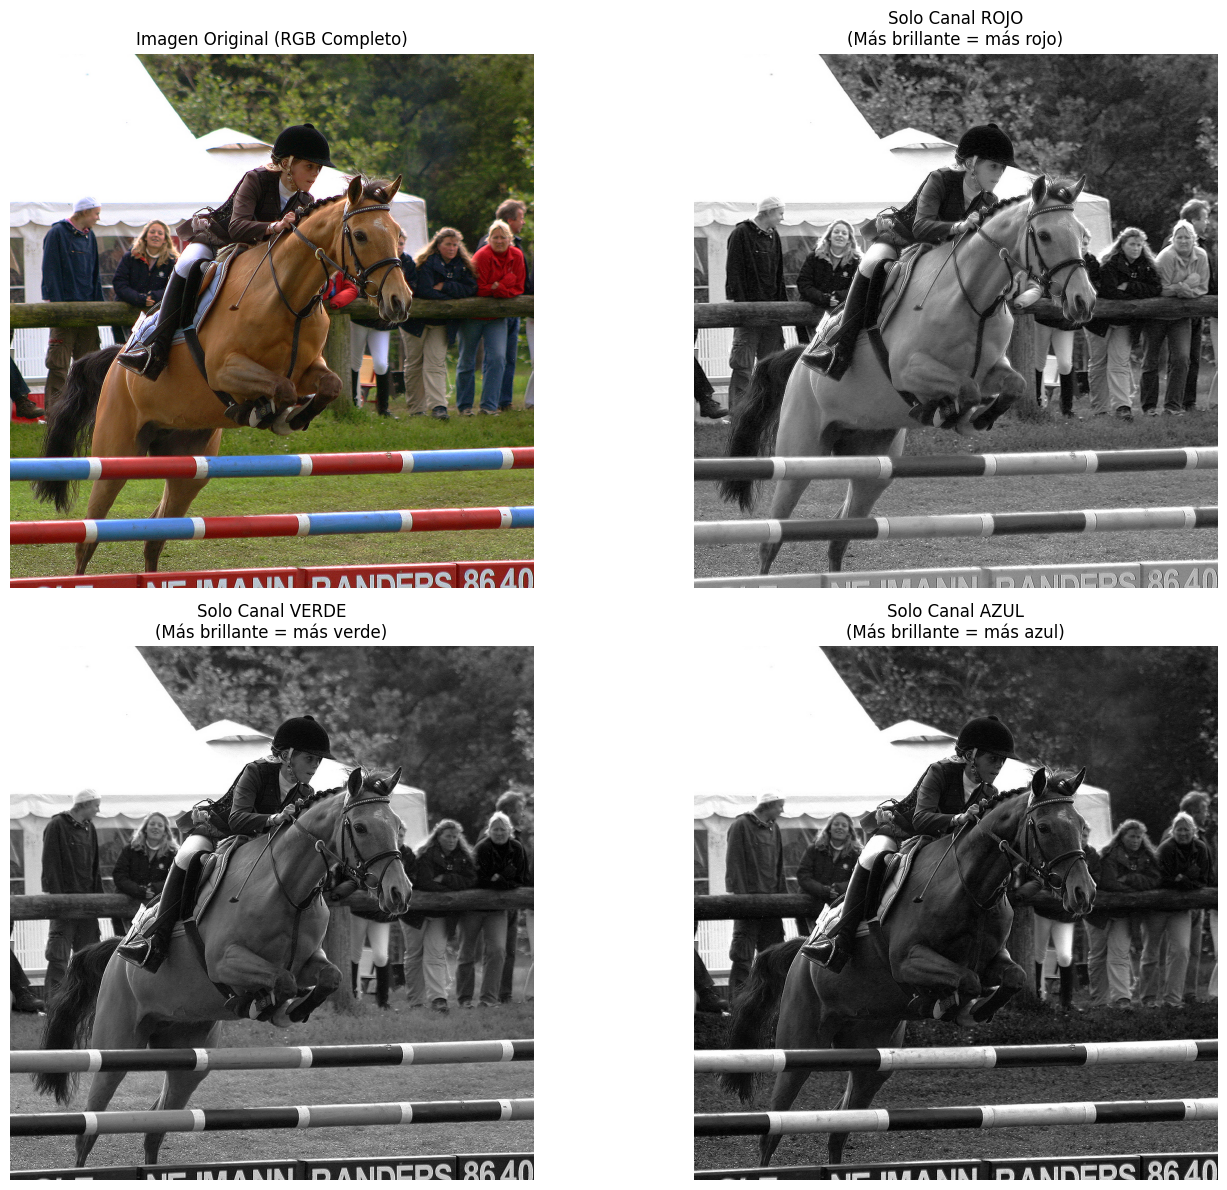

In [13]:
# Aplicá segmentación por umbralización
# Probá diferentes valores hasta encontrar el mejor
# Mostramos los tres canales
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Imagen original
axes[0, 0].imshow(imagen_trabajo)
axes[0, 0].set_title('Imagen Original (RGB Completo)', fontsize=12)
axes[0, 0].axis('off')

# Canal Rojo - mostramos en escala de grises para ver intensidades
axes[0, 1].imshow(canal_rojo, cmap='gray')
axes[0, 1].set_title('Solo Canal ROJO\n(Más brillante = más rojo)', fontsize=12)
axes[0, 1].axis('off')

# Canal Verde
axes[1, 0].imshow(canal_verde, cmap='gray')
axes[1, 0].set_title('Solo Canal VERDE\n(Más brillante = más verde)', fontsize=12)
axes[1, 0].axis('off')

# Canal Azul
axes[1, 1].imshow(canal_azul, cmap='gray')
axes[1, 1].set_title('Solo Canal AZUL\n(Más brillante = más azul)', fontsize=12)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()



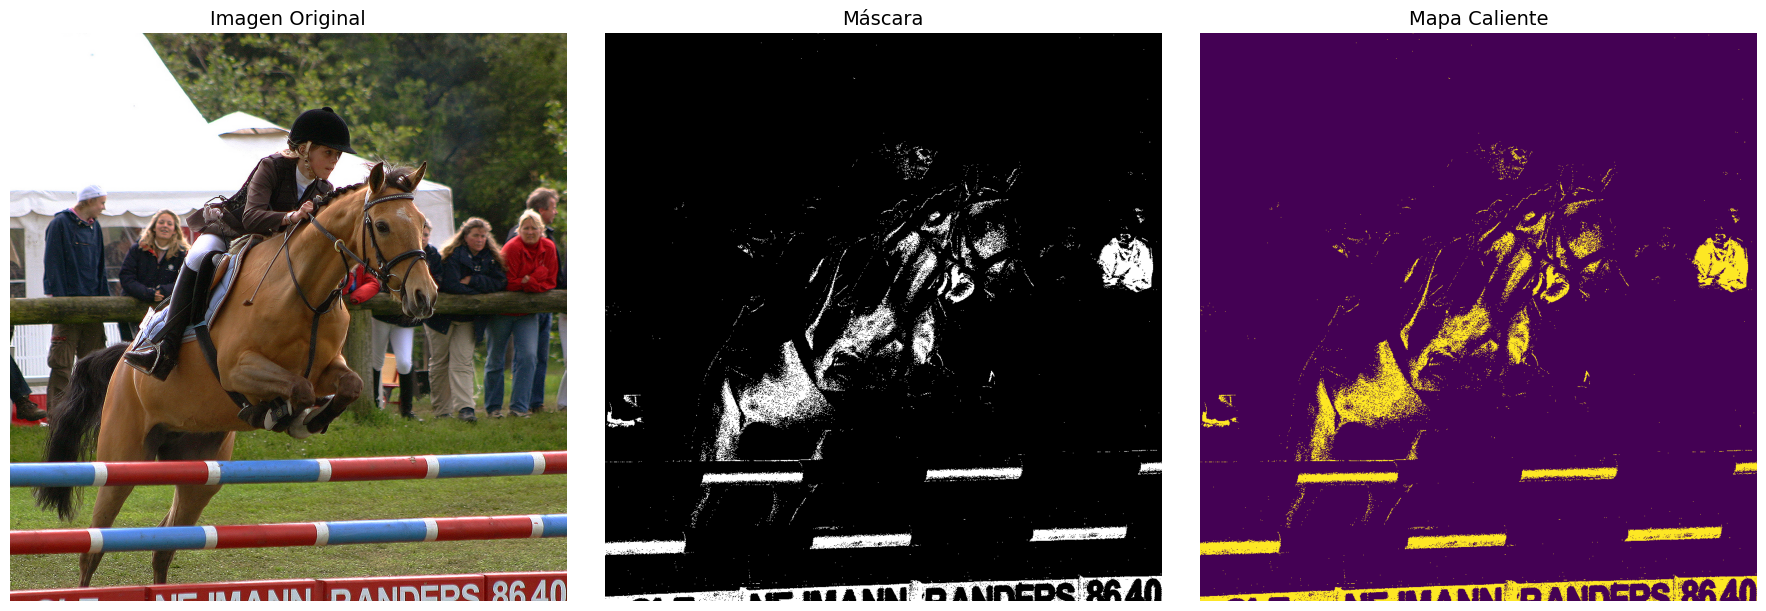

In [14]:
# Mostrá el resultado: original, escala de grises, y máscara
# Tu código aquí
# Mostramos la máscara junto con la imagen original
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Imagen original
axes[0].imshow(imagen_trabajo)
axes[0].set_title('Imagen Original', fontsize=14)
axes[0].axis('off')

# Máscara
axes[1].imshow(mascara_caballo, cmap='gray')
axes[1].set_title('Máscara', fontsize=14)
axes[1].axis('off')

# Máscara con colores más llamativos
axes[2].imshow(mascara_caballo, cmap='viridis')
axes[2].set_title("Mapa Caliente", fontsize=14)
axes[2].axis('off')

plt.tight_layout()
plt.show()


## 4.2 Mejora de Calidad

**Material de consulta:** `Mejora_Imagen_Ecualizacion.ipynb`

In [15]:
# Si tu imagen tiene problemas de contraste, aplicá ecualización
# Tu código aquí
imagen_hsv = cv2.cvtColor(imagen_trabajo, cv2.COLOR_RGB2HSV)
imagen_hsv[:, :, 2] = cv2.equalizeHist(imagen_hsv[:, :, 2])
imagen_ecualizada = cv2.cvtColor(imagen_hsv, cv2.COLOR_HSV2RGB)


## 4.3 Comparación de Resultados

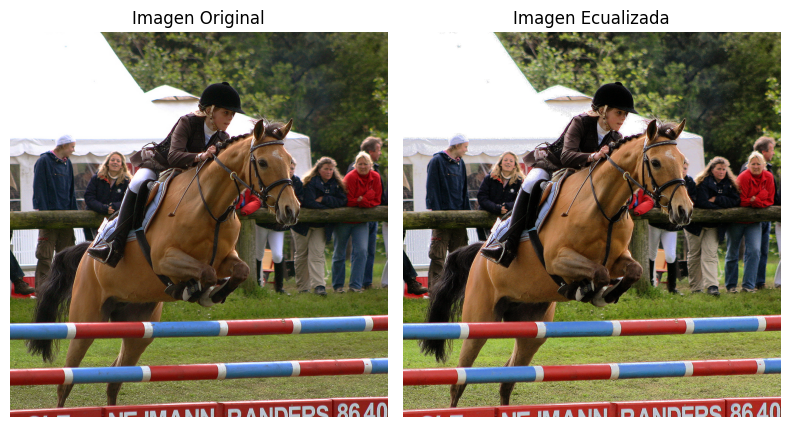

In [16]:
# Mostrá lado a lado: imagen original vs imagen procesada
# Muestro la imagen original y ecualizada
fig, axes = plt.subplots(1, 2, figsize=(8,16))
axes[0].imshow(imagen_trabajo)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(imagen_ecualizada)
axes[1].set_title('Imagen Ecualizada')
axes[1].axis('off')

plt.tight_layout()
plt.show()


## 4.4 Aplicación a las Otras Imágenes

Repetí el proceso para tus otras 2 imágenes, adaptando las técnicas según los problemas específicos de cada una:

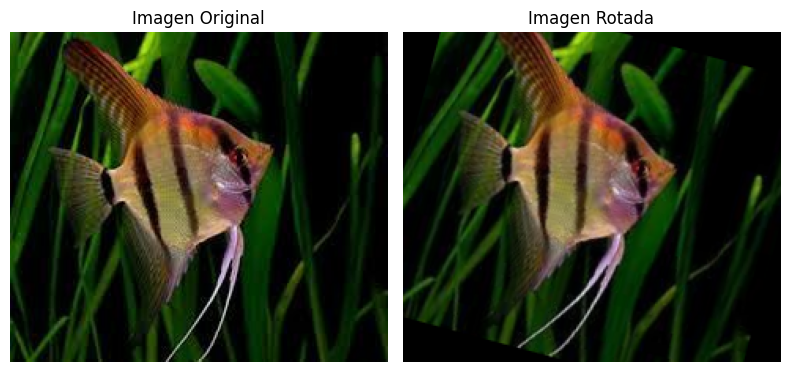

In [17]:
# Procesamiento de la segunda imagen
imagen_trabajo_2 = imagenes[1][:, :, [2, 1, 0]]
centro = (imagen_trabajo_2.shape[1] // 2, imagen_trabajo_2.shape[0] // 2)
angulo = -15
M = cv2.getRotationMatrix2D(centro, angulo, 1.0)
roi_rotado = cv2.warpAffine(imagen_trabajo_2, M, (imagen_trabajo_2.shape[1], imagen_trabajo_2.shape[0]))

# Mostramos la imagen original y rotada
fig, axes = plt.subplots(1, 2, figsize=(8,16))
axes[0].imshow(imagen_trabajo_2)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(roi_rotado)
axes[1].set_title('Imagen Rotada')
axes[1].axis('off')

plt.tight_layout()




(np.float64(-0.5), np.float64(850.5), np.float64(495.5), np.float64(-0.5))

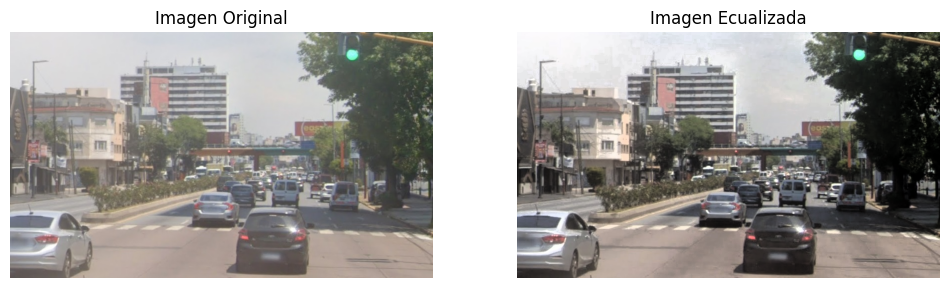

In [18]:
# Procesamiento de la tercera imagen
imagen_trabajo_3 = imagenes[2][:, :, [2, 1, 0]]
imagen_hsv = cv2.cvtColor(imagen_trabajo_3, cv2.COLOR_RGB2HSV)
imagen_hsv[:, :, 2] = cv2.equalizeHist(imagen_hsv[:, :, 2])
imagen_ecualizada = cv2.cvtColor(imagen_hsv, cv2.COLOR_HSV2RGB)

# Mostrar imagen original y equalizada
fig, axes = plt.subplots(1, 2, figsize=(12,24))
axes[0].imshow(imagen_trabajo_3)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(imagen_ecualizada)
axes[1].set_title('Imagen Ecualizada')
axes[1].axis('off')


## 4.5 Resultados Finales

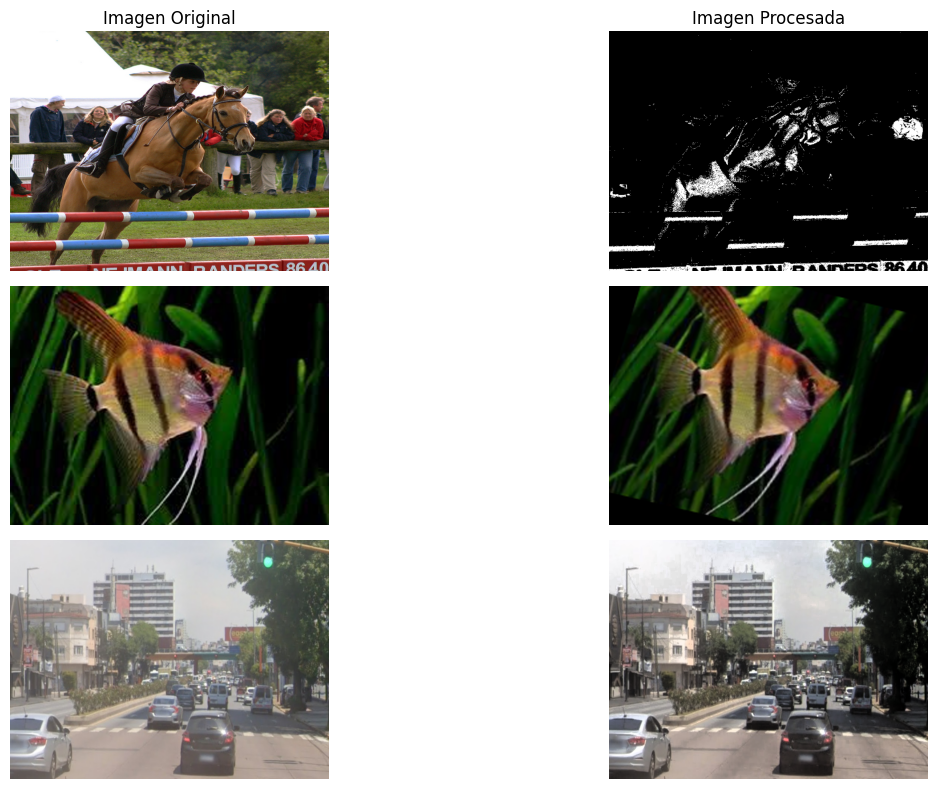

In [23]:
# Creá un grid mostrando las 3 imágenes originales y las 3 procesadas
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def crear_grid_imagenes(imagenes, titulos=["Imagen Original", "Imagen Procesada","","","","",""], filas=3, figsize=(15, 8)):

    n_imagenes = len(imagenes)
    columnas = int(np.ceil(n_imagenes / filas))

    fig, axes = plt.subplots(filas, columnas, figsize=figsize)

    if n_imagenes == 1:
        axes = [axes]
    elif filas == 1:
        axes = axes.reshape(1, -1)
    elif columnas == 1:
        axes = axes.reshape(-1, 1)

    axes = axes.flatten()

    # Define un tamaño uniforme para todas las imágenes
    uniform_size = (800, 600)

    for i, img in enumerate(imagenes):
        # Redimensionar la imagen antes de mostrarla
        if len(img.shape) == 2:  # Escala de grises
            img_resized = np.array(Image.fromarray(img).resize(uniform_size))
            axes[i].imshow(img_resized, cmap='gray')
        else:  # Color (RGB)
            img_resized = np.array(Image.fromarray(img).resize(uniform_size))
            axes[i].imshow(img_resized)

        if titulos and i < len(titulos):
            axes[i].set_title(titulos[i], fontsize=12)

        axes[i].axis('off')

    for i in range(n_imagenes, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Nota: para que este ejemplo funcione, necesitas tener cargadas las variables de imágenes.
crear_grid_imagenes([imagen_trabajo, mascara_caballo, imagen_trabajo_2, roi_rotado, imagen_trabajo_3, imagen_ecualizada])

---

# REFLEXIÓN FINAL

## Análisis de Resultados

**¿Qué técnica fue más efectiva para cada tipo de problema?**

* Imagen 1:

La técnica de umbralización y segmentación fue la más efectiva para aislar el objeto principal (el caballo y el jinete) del fondo complejo y lleno de elementos distractores. Al aplicar un umbral adecuado, se logró separar la figura del sujeto del fondo, permitiendo obtener una máscara binaria del objeto de interés. Esta segmentación es fundamental para análisis posteriores o para centrar la atención en la región de interés (ROI).

* Imagen 2:

La rotación de la imagen demostró ser la técnica más apropiada. El objetivo era corregir la leve inclinación del pez para obtener una vista recta y horizontal del objeto. Mediante la rotación geométrica de la imagen, se corrigió la orientación, lo que facilita el análisis de la forma, la medición de sus características, o su posterior clasificación.

* Imagen 3:

La ecualización de histograma fue la técnica más eficaz para mejorar la calidad de la imagen. La imagen original presentaba problemas de alto brillo y bajo contraste, lo que resultaba en una distribución tonal limitada. La ecualización redistribuyó los niveles de intensidad de los píxeles, ampliando el rango dinámico del histograma. Como resultado, se corrigió el exceso de brillo, se mejoró el contraste general y se reveló una mayor cantidad de detalles en las zonas claras y oscuras, logrando una representación más fiel de la escena.

**¿Qué desafíos encontraste durante el procesamiento?**

* Imagen 1: Encontrar el umbral correcto para aislar el objeto principal
* Imagen 2: Encontrar la inclinacion optima para obtener una vista recta.
* Imagen 3: Encontrar una imagen alterada para realizar este trabajo.

**¿En qué casos los resultados no fueron óptimos y por qué?**

El problema principal radica en la naturaleza de la técnica de umbralización utilizada. Esta técnica segmenta una imagen basándose en un único valor de umbral para todos los píxeles. En una imagen con un fondo complejo, donde múltiples objetos (como la multitud) tienen valores de intensidad de píxeles similares a los del objeto principal, la aplicación de un umbral fijo resulta ineficiente.

## Aprendizaje Adquirido

**¿Qué conceptos del curso fueron más útiles?**

Me fueron utiles los conseptos de umbralizacion, segmentacion, ROI, ecualizacion de imagen, imagen binaria y OpenCV que aprendimos en clase

**¿Cómo podrías mejorar este sistema en futuras versiones?**

El sistema podría analizar las propiedades de la imagen y sugerir automáticamente la técnica más adecuada. Por ejemplo, si el histograma de colores es muy estrecho, el sistema sugeriría ecualización; si la imagen está rotada, sugeriría corrección de rotación. Para la imagen del pez, podría detectar el ángulo de la línea principal del objeto y calcular la rotación necesaria de forma automática.

Interfaz de usuario: Ofrecer una interfaz gráfica intuitiva donde el usuario pueda cargar la imagen, ver un análisis inicial del problema y aplicar las técnicas recomendadas con un solo clic. Este sistema podria ser accesible para usuarios sin conocimientos técnicos avanzados en procesamiento de imágenes.
